The code aims to preprocess nutritional data, train machine learning models, evaluate their performance, visualize results, conduct network analysis, and analyze nutrient correlations for insightful understanding.

Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



Loading Dataset

In [ ]:
# Load the data into a pandas DataFrame
# Assuming the data is loaded into a DataFrame called df
df = pd.read_csv('/content/nutrients_csvfile.csv')
df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


Preprocessing

In [ ]:
# Data Preprocessing
# Remove unnecessary columns and set appropriate data types
df = df[['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs', 'Category']]

# Convert columns to numeric, handling errors
columns_to_convert = ['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (NaN) in the 'Grams' column
df.dropna(subset=['Grams'], inplace=True)

In [ ]:
# Handling missing data
df.fillna(0, inplace=True)  # Replace missing values with 0



In [ ]:
# Data Scaling
scaler = MinMaxScaler()
df[['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']] = scaler.fit_transform(df[['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']])



In [ ]:
# Encoding categorical variables
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])


Training

In [ ]:
# Model Training
X = df[['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']]
y = df['Category']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model BUilding

In [ ]:
# Train models
lr_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()

lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier()

Evaluation

In [ ]:
# Model Evaluation
# Evaluate using appropriate metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm


In [ ]:
# Evaluate each model
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_cm = evaluate_model(lr_model, X_test, y_test)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_cm = evaluate_model(svm_model, X_test, y_test)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_cm = evaluate_model(rf_model, X_test, y_test)

# Comparative Study
# Create a DataFrame for comparative study
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [lr_accuracy, svm_accuracy, rf_accuracy],
    'Precision': [lr_precision, svm_precision, rf_precision],
    'Recall': [lr_recall, svm_recall, rf_recall],
    'F1 Score': [lr_f1, svm_f1, rf_f1]
})

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


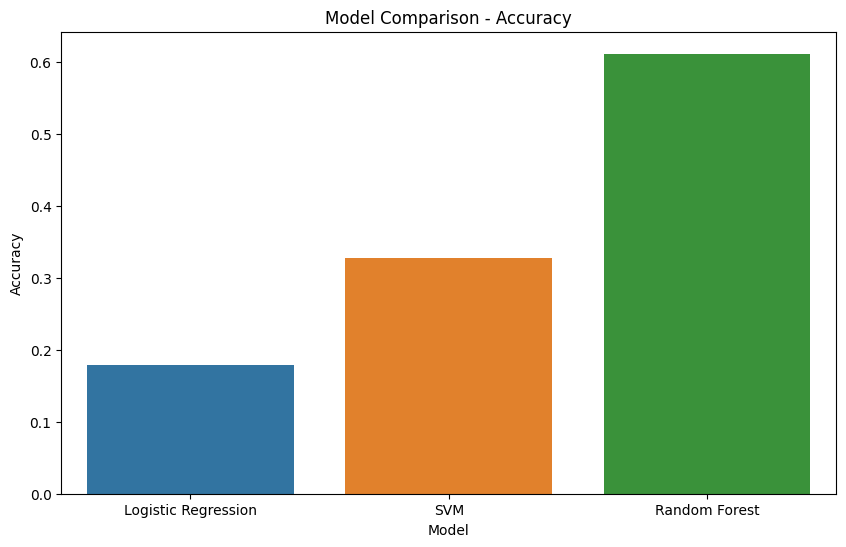

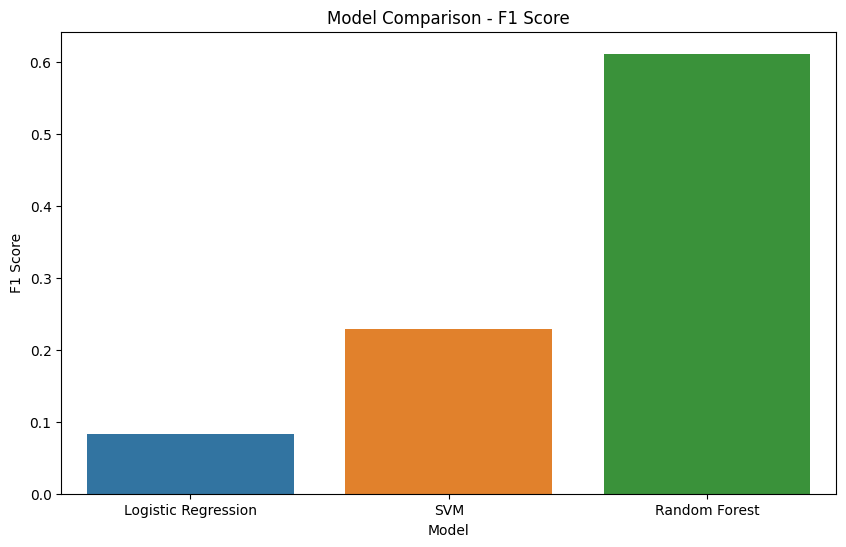

Confusion Matrix - Logistic Regression:
[[7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [8 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Confusion Matrix - SVM:
[[6 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [3 2 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 7 0 0 0 0 1]
 [2 0 0 0 0 0 0 3 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 3 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 4 0 1]
 [0 0 0 0 

In [ ]:
# Plot evaluation metrics for comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Model', y='Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Model', y='F1 Score')
plt.title('Model Comparison - F1 Score')
plt.show()

# Print confusion matrices
print("Confusion Matrix - Logistic Regression:")
print(lr_cm)
print("\nConfusion Matrix - SVM:")
print(svm_cm)
print("\nConfusion Matrix - Random Forest:")
print(rf_cm)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and values to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Train the best model
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6119402985074627


Feature Importances:
     Feature  Importance
0     Grams    0.190326
6     Carbs    0.173513
2   Protein    0.157919
1  Calories    0.157033
5     Fiber    0.140920
3       Fat    0.101003
4   Sat.Fat    0.079286


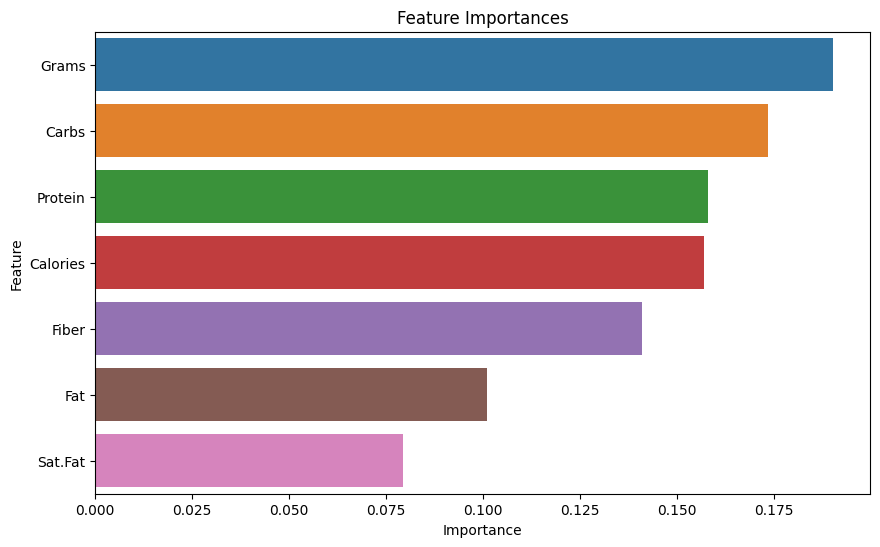

In [ ]:
# Fit the model to the training data to get feature importances
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [ ]:
# Assuming you have the feature_importance_df sorted by importance

# Select the top n features (e.g., top 5)
top_n = 5
top_features = feature_importance_df['Feature'][:top_n]

# Filter the training and testing data to keep only the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain the model using only the top features
rf_model_top = RandomForestClassifier(random_state=42)
rf_model_top.fit(X_train_top, y_train)

# Evaluate the model with the top features
y_pred_top = rf_model_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
print("Accuracy with Top Features:", accuracy_top)


Accuracy with Top Features: 0.5373134328358209


In [ ]:
from sklearn.utils import class_weight
import numpy as np
# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to a dictionary for Random Forest
class_weight_dict = dict(enumerate(class_weights))

# Create the Random Forest model with class weights
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

# Train the model
rf_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_weighted = rf_model_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy with Class Weights:", accuracy_weighted)


Accuracy with Class Weights: 0.5970149253731343


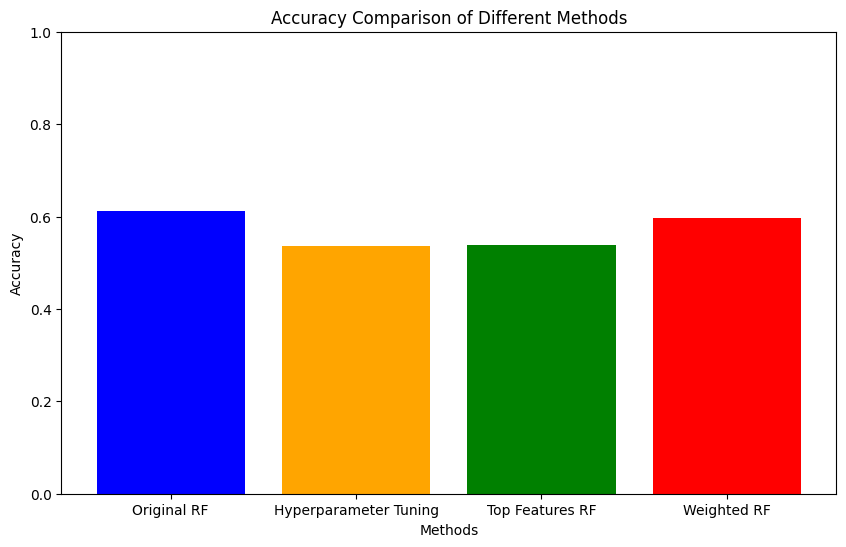

In [ ]:
import matplotlib.pyplot as plt

# List of accuracy scores from different methods
accuracy_scores = [accuracy, grid_search.best_score_, accuracy_top, accuracy_weighted]

# Labels for the bars
methods = ['Original RF', 'Hyperparameter Tuning', 'Top Features RF', 'Weighted RF']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(methods, accuracy_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])  # Set the y-axis limits between 0 and 1
plt.title('Accuracy Comparison of Different Methods')
plt.show()


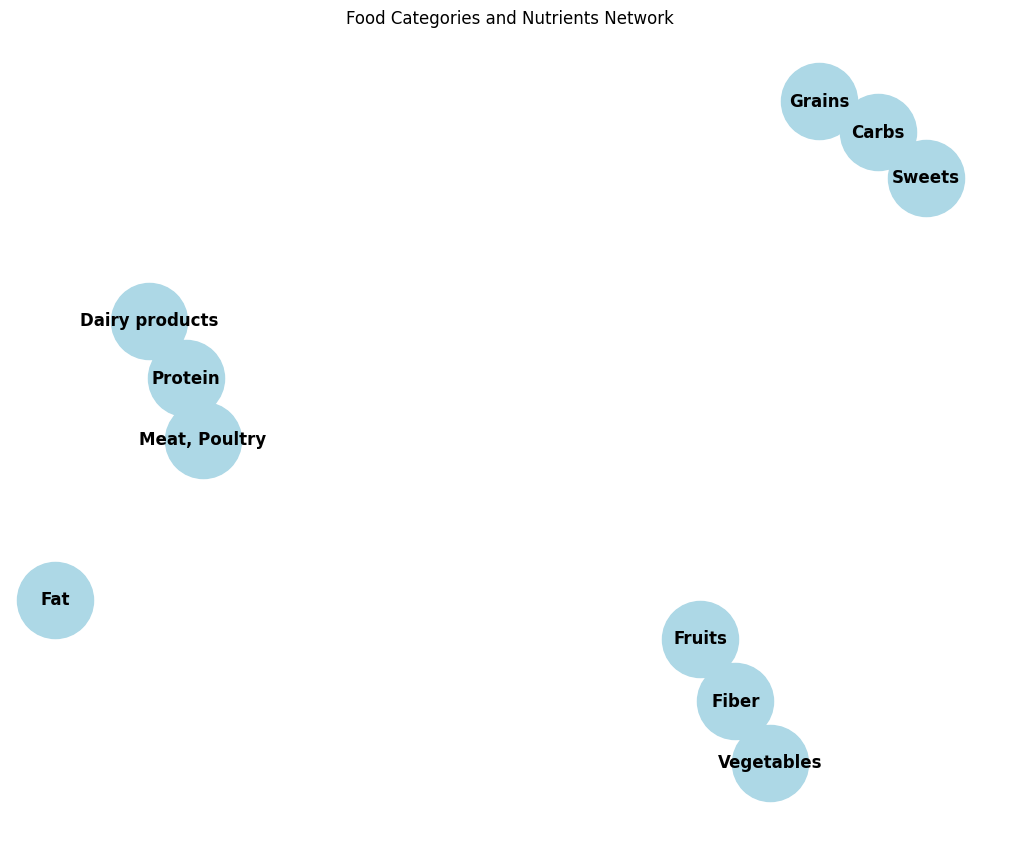

Degree Centrality:
{'Dairy products': 0.1111111111111111, 'Meat, Poultry': 0.1111111111111111, 'Vegetables': 0.1111111111111111, 'Fruits': 0.1111111111111111, 'Grains': 0.1111111111111111, 'Sweets': 0.1111111111111111, 'Protein': 0.2222222222222222, 'Fat': 0.0, 'Fiber': 0.2222222222222222, 'Carbs': 0.2222222222222222}

Closeness Centrality:
{'Dairy products': 0.14814814814814814, 'Meat, Poultry': 0.14814814814814814, 'Vegetables': 0.14814814814814814, 'Fruits': 0.14814814814814814, 'Grains': 0.14814814814814814, 'Sweets': 0.14814814814814814, 'Protein': 0.2222222222222222, 'Fat': 0.0, 'Fiber': 0.2222222222222222, 'Carbs': 0.2222222222222222}

Betweenness Centrality:
{'Dairy products': 0.0, 'Meat, Poultry': 0.0, 'Vegetables': 0.0, 'Fruits': 0.0, 'Grains': 0.0, 'Sweets': 0.0, 'Protein': 0.027777777777777776, 'Fat': 0.0, 'Fiber': 0.027777777777777776, 'Carbs': 0.027777777777777776}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes for food categories or nutrients
food_categories = ['Dairy products', 'Meat, Poultry', 'Vegetables', 'Fruits', 'Grains', 'Sweets']
nutrients = ['Protein', 'Fat', 'Fiber', 'Carbs']
all_nodes = food_categories + nutrients
G.add_nodes_from(all_nodes)

# Add edges to represent relationships (you can customize these based on your analysis)
edges = [('Dairy products', 'Protein'), ('Meat, Poultry', 'Protein'), ('Vegetables', 'Fiber'),
         ('Fruits', 'Fiber'), ('Grains', 'Carbs'), ('Sweets', 'Carbs')]
G.add_edges_from(edges)

# Plot the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positioning algorithm for the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', edge_color='gray')
plt.title('Food Categories and Nutrients Network')
plt.show()

# Compute key network metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the key network metrics
print('Degree Centrality:')
print(degree_centrality)
print('\nCloseness Centrality:')
print(closeness_centrality)
print('\nBetweenness Centrality:')
print(betweenness_centrality)


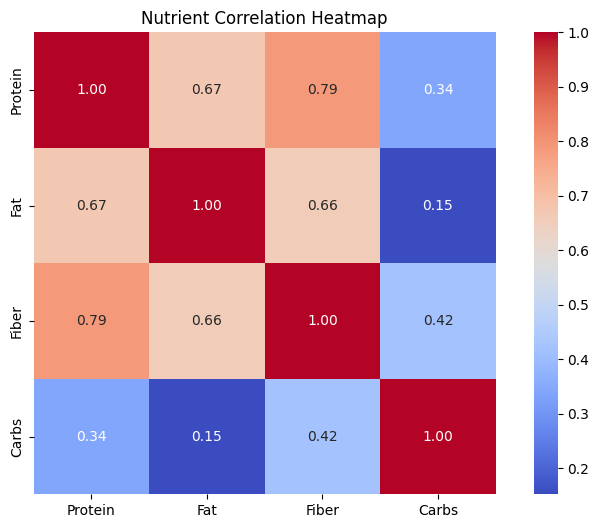

In [ ]:
# Select relevant columns for nutrient correlation analysis
nutrient_columns = ['Protein', 'Fat', 'Fiber', 'Carbs']

# Calculate the correlation matrix
correlation_matrix = df[nutrient_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Nutrient Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the nutritional data into a DataFrame
# Assuming the data is loaded into a DataFrame called 'df'

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Protein', 'Fat', 'Fiber', 'Carbs', 'Category'])

# Encode the 'Category' column
label_encoder = LabelEncoder()
df['CategoryEncoded'] = label_encoder.fit_transform(df['Category'])

# Features and target
X = df[['Protein', 'Fat', 'Fiber', 'Carbs']]
y = df['CategoryEncoded']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Initialize and train Naive Bayes (GaussianNB) model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Define a function to calculate and print metrics
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Print metrics for K-Nearest Neighbors (KNN)
print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

# Print metrics for Naive Bayes
print_metrics(y_test, y_pred_naive_bayes, "Naive Bayes")


Metrics for K-Nearest Neighbors (KNN):
Accuracy: 0.44
Precision: 0.40
Recall: 0.44
F1 Score: 0.40

Metrics for Naive Bayes:
Accuracy: 0.45
Precision: 0.50
Recall: 0.45
F1 Score: 0.41



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (assuming the dataset is in a DataFrame named 'df')
# Replace 'your_data.csv' with the actual file path if needed
df = pd.read_csv('/content/nutrients_csvfile.csv')

# Assuming 'Food' and 'Category' are the relevant columns
X = df['Food']  # Features
y = df['Category']  # Target labels

# Convert the food names to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict the categories for the test set
y_pred = naive_bayes.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.373134328358209
Classification Report:
                                  precision    recall  f1-score   support

Breads, cereals, fastfood,grains       0.20      1.00      0.33         7
                  Dairy products       1.00      0.67      0.80         6
                Desserts, sweets       0.50      0.40      0.44         5
       Drinks,Alcohol, Beverages       0.00      0.00      0.00         3
         Fats, Oils, Shortenings       0.00      0.00      0.00         1
                   Fish, Seafood       0.00      0.00      0.00         9
                      Fruits A-F       0.00      0.00      0.00         6
                      Fruits G-P       0.50      0.60      0.55         5
                   Jams, Jellies       0.00      0.00      0.00         1
                   Meat, Poultry       0.50      0.67      0.57         6
                  Seeds and Nuts       0.00      0.00      0.00         3
                           Soups       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the nutritional data into a DataFrame
# Assuming the data is loaded into a DataFrame called 'df'

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Protein', 'Fat', 'Fiber', 'Carbs', 'Category'])

# Handle non-numeric values in the dataset
non_numeric_cols = ['Protein', 'Fat', 'Fiber', 'Carbs']
df[non_numeric_cols] = df[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values again after handling non-numeric values
df = df.dropna(subset=['Protein', 'Fat', 'Fiber', 'Carbs'])

# Encode the 'Category' column
label_encoder = LabelEncoder()
df['CategoryEncoded'] = label_encoder.fit_transform(df['Category'])

# Features and target
X = df[['Protein', 'Fat', 'Fiber', 'Carbs']]
y = df['CategoryEncoded']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes (GaussianNB) model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict using the trained model
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_naive_bayes)
precision = precision_score(y_test, y_pred_naive_bayes, average='weighted')
recall = recall_score(y_test, y_pred_naive_bayes, average='weighted')
f1 = f1_score(y_test, y_pred_naive_bayes, average='weighted')

# Print evaluation metrics
print("Naive Bayes Classifier Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Naive Bayes Classifier Evaluation:
Accuracy: 0.31
Precision: 0.24
Recall: 0.31
F1 Score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
